## SALARY DATA

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("Salary_Data (1).csv")

In [ ]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
data[data.duplicated()].shape

(0, 2)

In [ ]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

<ipython-input-9-f0f3c37637f8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

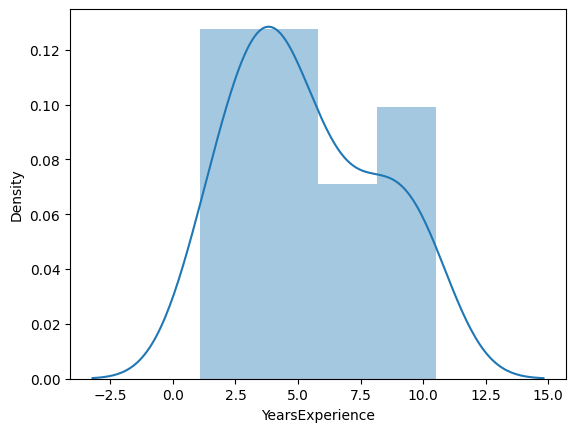

In [ ]:
sns.distplot(data['YearsExperience'])

<ipython-input-10-10b07b01fa97>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

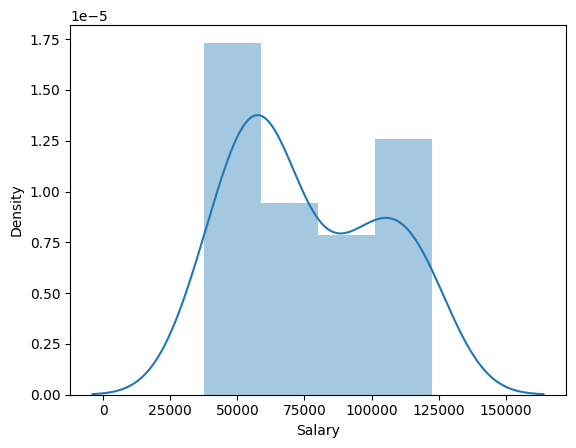

In [ ]:
sns.distplot(data['Salary'])

In [ ]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=data).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

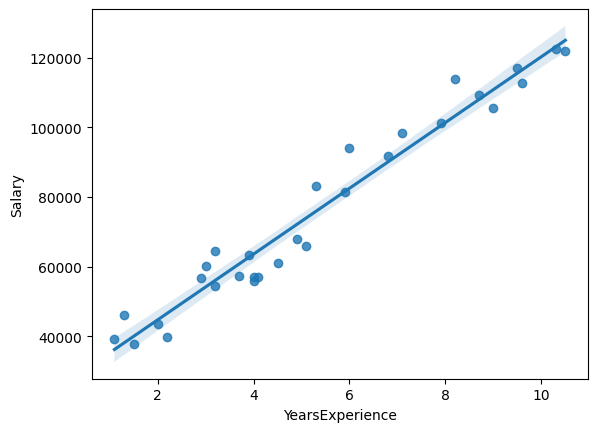

In [ ]:
sns.regplot(x="YearsExperience",y="Salary",data=data)

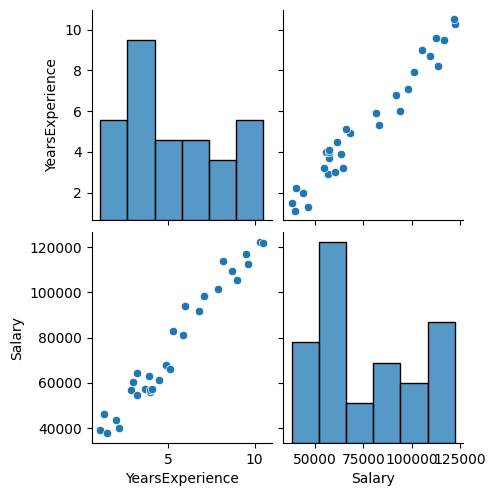

In [ ]:
sns.pairplot(data)

In [ ]:
model.params #Bo and B1

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

TRANSFORMATION USING LOG

In [ ]:
model2=smf.ols("Salary~np.log(YearsExperience)",data=data).fit()

In [ ]:
model2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [ ]:
(model2.rsquared,model2.rsquared_adj)

(0.8538888828756969, 0.8486706286926861)

In [ ]:
model3=smf.ols("np.log(Salary)~YearsExperience",data=data).fit()
model3.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [ ]:
(model3.rsquared,model3.rsquared_adj)

(0.9319671194084196, 0.929537373673006)

TRANSFORMATION USING QUAD AND SQ

In [ ]:
data["YearsExperience_Sq"] = data.YearsExperience * data.YearsExperience
model_quad = smf.ols("Salary~YearsExperience+YearsExperience_Sq",data=data).fit()
model_quad.params

Intercept             26214.932677
YearsExperience        9259.283888
YearsExperience_Sq       16.392566
dtype: float64

In [ ]:
(model_quad.rsquared,model_quad.rsquared_adj)

(0.956975168321065, 0.953788143752255)

PREDICTION FOR 2 YEARS EXPERIENCE

In [ ]:
Salary = (25792.200199) + (9449.962321)*(2)
Salary

44692.124841

In [ ]:
new_data=pd.Series([2,5])
new_data

0    2
1    5
dtype: int64

In [ ]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,2
1,5


In [ ]:
model.predict(data_pred)

0    44692.124842
1    73042.011806
dtype: float64

##DELIVERY TIME

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<ipython-input-31-ea2f6099b8bf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

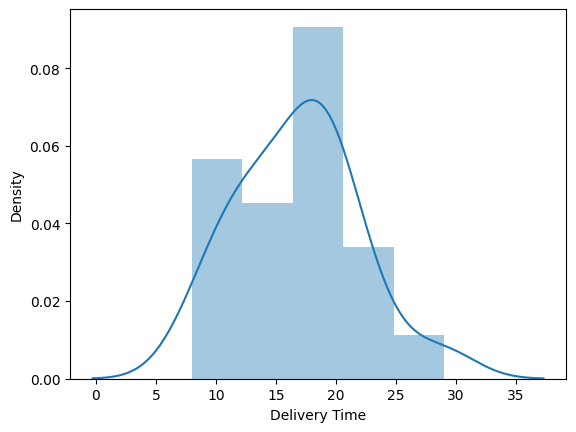

In [ ]:
sns.distplot(dataset['Delivery Time'])

<ipython-input-32-87e4431da1bd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

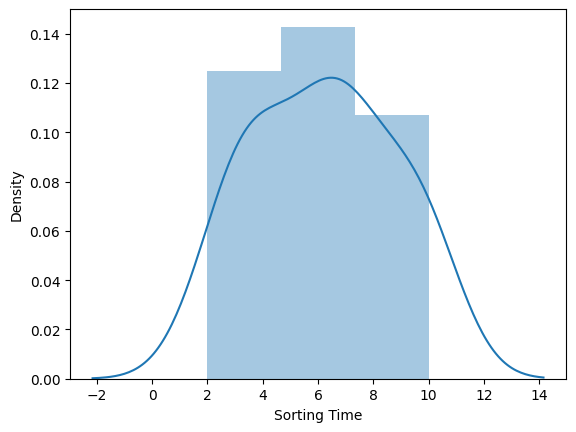

In [ ]:
sns.distplot(dataset['Sorting Time'])

In [ ]:
# Renaming Columns
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

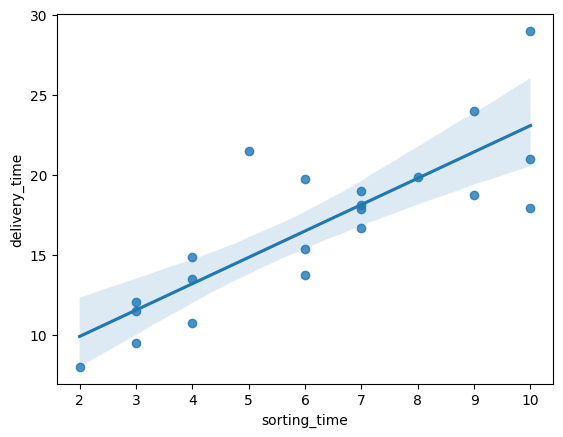

In [ ]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

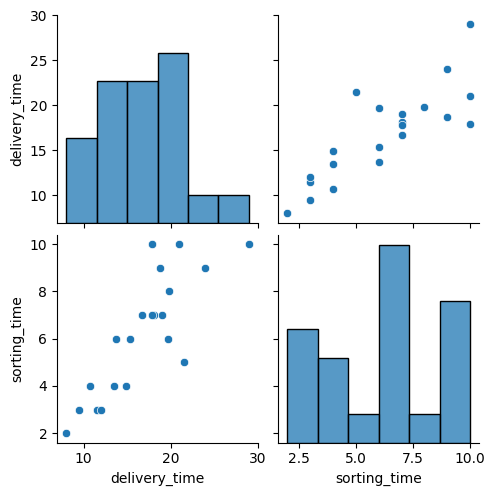

In [ ]:
sns.pairplot(dataset)

In [ ]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

In [ ]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [ ]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

TRANSFORMATION USING LOG

In [ ]:
model1=smf.ols("delivery_time~np.log(sorting_time)",data=dataset).fit()
model1.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [ ]:
model1.rsquared , model1.rsquared_adj

(0.6954434611324223, 0.6794141696130761)

In [ ]:
model2=smf.ols("np.log(delivery_time)~sorting_time",data=dataset).fit()
model2.params

Intercept       2.121372
sorting_time    0.105552
dtype: float64

In [ ]:
model2.rsquared , model2.rsquared_adj

(0.7109478980584187, 0.6957346295351776)

TRANSFORMATION USING QUAD AND SQ

In [ ]:
dataset["sorting_time_Sq"] = dataset.sorting_time * dataset.sorting_time
model_quad = smf.ols("delivery_time~sorting_time+sorting_time_Sq",data=dataset).fit()
model_quad.params

Intercept          3.522234
sorting_time       2.813002
sorting_time_Sq   -0.093198
dtype: float64

In [ ]:
model_quad.rsquared , model_quad.rsquared_adj

(0.6934396274520247, 0.659377363835583)

MODEL PREDICTION

In [ ]:
delivery_time = (6.582734) + (1.649020)*(2)
delivery_time

9.880774

In [ ]:
new_data=pd.Series([2,8])
new_data

0    2
1    8
dtype: int64

In [ ]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,2
1,8


In [ ]:
model.predict(data_pred)

0     9.880774
1    19.774893
dtype: float64